In [1]:
import torch
import torch.nn as nn
# note
import torch.optim as optim
# note
import torch.utils.data as data
from matplotlib import pyplot as plt

In [2]:
X = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])

In [3]:
class LinearRegressionDataset(data.Dataset):
    def __init__(self, X, y):
        super().__init__()
        self.X = X.reshape(-1, 1)
        self.y = y.reshape(-1, 1)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, ind):
        return self.X[ind], self.y[ind]

In [4]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.rand(1))
        self.b = nn.Parameter(torch.rand(1))

    def forward(self, x):
        return (self.w * x) + self.b

In [5]:
dataset = LinearRegressionDataset(X, y)
# batch_size is kept 1 as data is small. So treating it as stochastic gradient descent only
batch_size = dataset.__len__()
dataloader = data.DataLoader(dataset, batch_size=batch_size, shuffle= True)

In [6]:
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr= 0.001)

In [8]:
loss_list = []
for epoch in range(100):
    # setting model to training mode
    model.train()
    running_loss = 0.0
    for input, target in dataloader:
        optimizer.zero_grad()
        output = model(input)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'parameters = w = {model.w.item()}, b = {model.b.item()}, loss = {loss.item()}')
    loss_list.append(running_loss)
        

parameters = w = 7.493597984313965, b = 0.968833863735199, loss = 12767.3828125
parameters = w = 9.394584655761719, b = 1.103049874305725, loss = 5653.8408203125
parameters = w = 10.627764701843262, b = 1.1913737058639526, loss = 2659.90234375
parameters = w = 11.427704811096191, b = 1.249924659729004, loss = 1399.813720703125
parameters = w = 11.94658088684082, b = 1.289159893989563, loss = 869.4639892578125
parameters = w = 12.283116340637207, b = 1.3158636093139648, loss = 646.2440185546875
parameters = w = 12.501358032226562, b = 1.3344371318817139, loss = 552.2885131835938
parameters = w = 12.64285659790039, b = 1.3477356433868408, loss = 512.7372436523438
parameters = w = 12.73456859588623, b = 1.3576116561889648, loss = 496.08367919921875
parameters = w = 12.793980598449707, b = 1.3652667999267578, loss = 489.0672912597656
parameters = w = 12.832438468933105, b = 1.3714807033538818, loss = 486.10675048828125
parameters = w = 12.85730266571045, b = 1.3767591714859009, loss = 484.

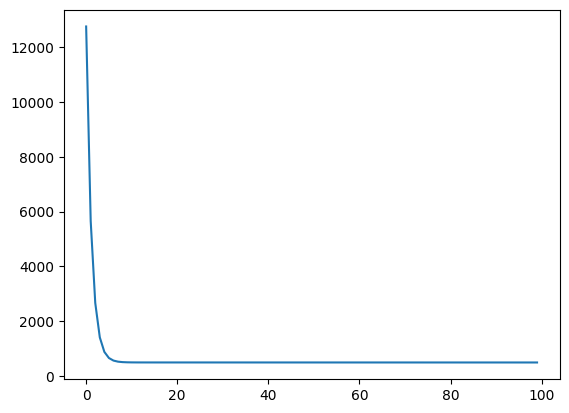

In [9]:
plt.plot(loss_list)
plt.show()